In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# This notebook contains the plots used in the presentation for the XKE 2020-02

Image size: (512, 512)


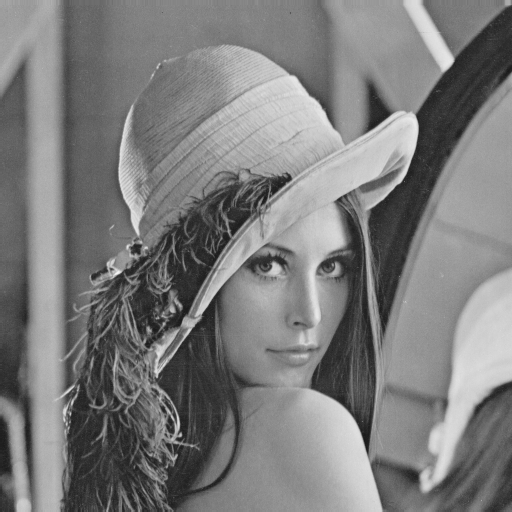

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9
from PIL import Image

import jpeg.freq


image_path = Path('..', 'images', 'lena512.bmp')
image = Image.open(image_path)

print('Image size:', image.size)
image

In [4]:
im = np.array(image.getdata()).reshape(image.size[::-1] + (-1,))
# Ignore the alpha channel
im = im[:, :, :3].mean(axis=2)

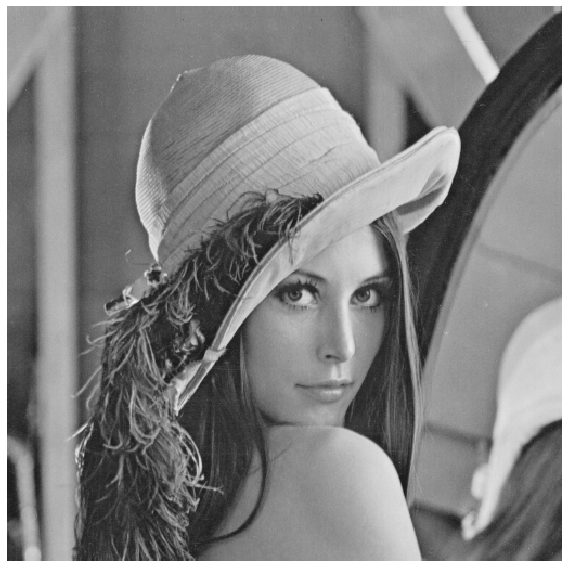

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena.png'))

# Lena twice

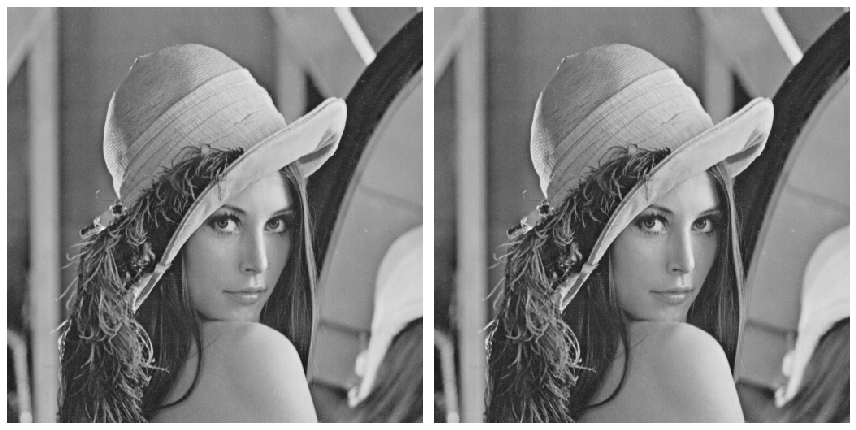

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(im, vmin=0, vmax=255, cmap='gray')
axes[1].imshow(im, vmin=0, vmax=255, cmap='gray')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-twice.png'))

# Lena hundred

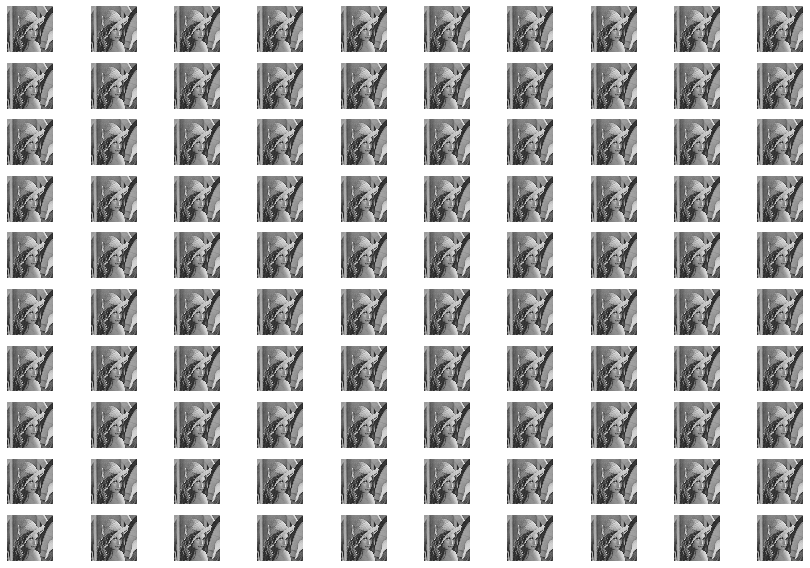

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(12, 8))
for ax in axes.flatten():
    ax.imshow(im, vmin=0, vmax=255, cmap='gray')
    ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-hundred.png'))

# Lena rotate

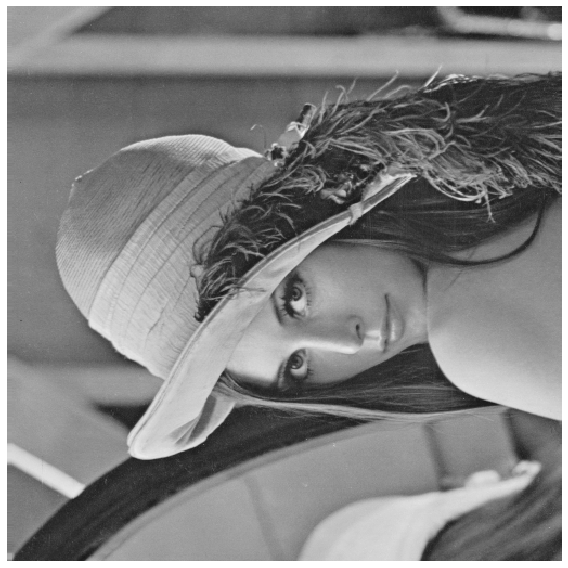

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(np.transpose(im), vmin=0, vmax=255, cmap='gray')
ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-rot.png'))

# Noise image

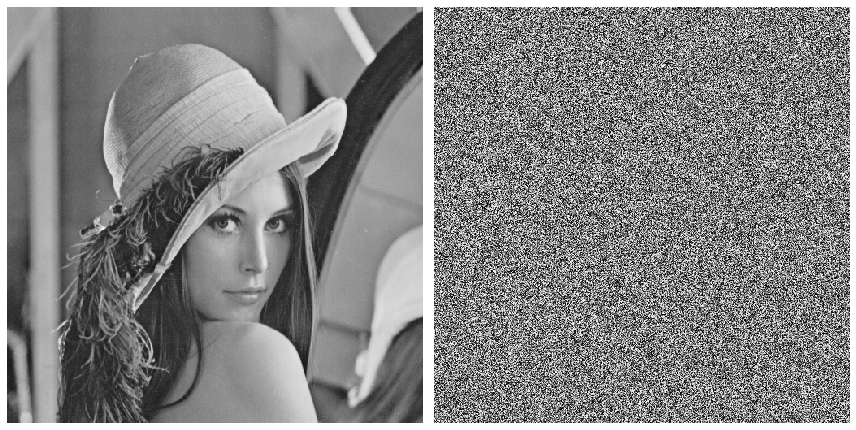

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(im, vmin=0, vmax=255, cmap='gray')
axes[1].imshow(np.random.randint(0, 255, size=im.shape), vmin=0, vmax=255, cmap='gray')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-noise.png'))

In [100]:
plotr = pd.DataFrame({'bytes': [1000], 'info': [10]})

theme = lambda ggplot: (
    ggplot
    + p9.labels.xlab('# bytes')
    + p9.labels.ylab('useful information')
    + p9.xlim([0, 1100])
    + p9.ylim([0, 11])
    + p9.theme_xkcd()
    + p9.theme(
        axis_text=p9.element_text(alpha=0)
    )
)

theme(
    p9.ggplot()
    + p9.geom_point(data=plotr, mapping=p9.aes(x='bytes', y='info'))
    + p9.labels.ggtitle('Original data')
).save(Path('..', 'images', 'schematic-compression'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/schematic-compression
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [101]:
plotr = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 10]})
theme(
    p9.ggplot()
    + p9.geom_line(data=plotr, mapping=p9.aes(x='bytes', y='info'), linetype='dashed', color='green')
    + p9.geom_point(data=plotr, mapping=p9.aes(x='bytes', y='info'))
    + p9.labels.ggtitle('Perfect compression')
    + p9.theme(plot_title=p9.element_text(color='red'))
).save(Path('..', 'images', 'schematic-compression-perfect'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/schematic-compression-perfect
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [102]:
plotr_perfect = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 10]})
plotr_bad = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 1]})

colors = ['green', 'red']

plot = p9.ggplot()
for idx, plotr in enumerate((plotr_perfect, plotr_bad)):
    plot = (
        plot
        + p9.geom_line(data=plotr, mapping=p9.aes(x='bytes', y='info'), linetype='dashed', color=colors[idx])
        + p9.geom_point(data=plotr, mapping=p9.aes(x='bytes', y='info'))
    )
    

( 
    theme(plot)
    + p9.labels.ggtitle('Naive compression')
    + p9.theme(plot_title=p9.element_text(color='red'))
).save(Path('..', 'images', 'schematic-compression-naive'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/schematic-compression-naive
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [103]:
plotr_perfect = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 10]})
plotr_bad = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 1]})
plotr_better = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 5]})

colors = ['green', 'red', 'orange']

plot = p9.ggplot()
for idx, plotr in enumerate((plotr_perfect, plotr_bad, plotr_better)):
    plot = (
        plot
        + p9.geom_line(data=plotr, mapping=p9.aes(x='bytes', y='info'), linetype='dashed', color=colors[idx])
        + p9.geom_point(data=plotr, mapping=p9.aes(x='bytes', y='info'))
    )
    

( 
    theme(plot)
    + p9.labels.ggtitle('Better compression')
    + p9.theme(plot_title=p9.element_text(color=colors[-1]))
).save(Path('..', 'images', 'schematic-compression-better'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/schematic-compression-better
  warn('Filename: {}'.format(filename), PlotnineWarning)


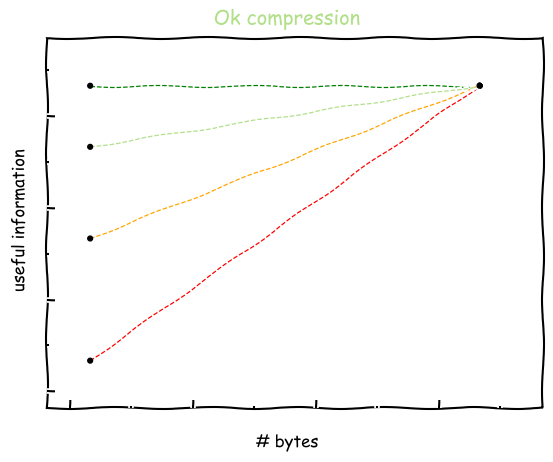

<ggplot: (334483673)>

In [105]:
plotr_perfect = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 10]})
plotr_bad = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 1]})
plotr_better = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 5]})
plotr_ok = pd.DataFrame({'bytes': [1000, 50], 'info': [10, 8]})

colors = ['green', 'red', 'orange', '#b2df8a']

plot = p9.ggplot()
for idx, plotr in enumerate((plotr_perfect, plotr_bad, plotr_better, plotr_ok)):
    plot = (
        plot
        + p9.geom_line(data=plotr, mapping=p9.aes(x='bytes', y='info'), linetype='dashed', color=colors[idx])
        + p9.geom_point(data=plotr, mapping=p9.aes(x='bytes', y='info'))
    )
    

( 
    theme(plot)
    + p9.labels.ggtitle('Ok compression')
    + p9.theme(plot_title=p9.element_text(color=colors[-1]))
).save(Path('..', 'images', 'schematic-compression-ok'))

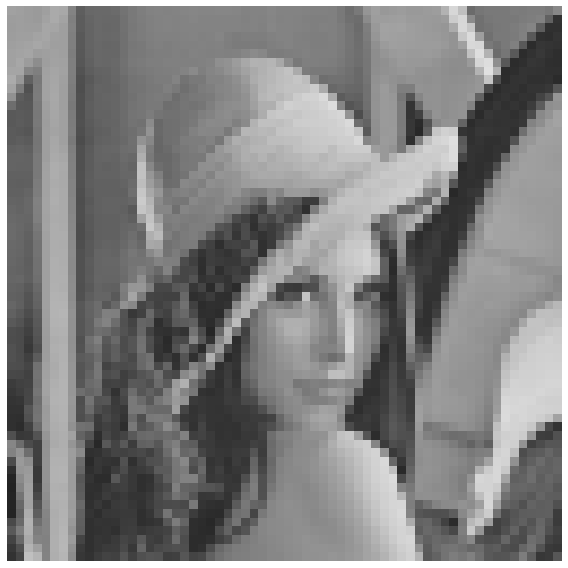

In [122]:
window_size = 8

downsampled = np.zeros((int(im.shape[0] / window_size), int(im.shape[1] / window_size)))
for idx_y, y in enumerate(range(0, im.shape[0], window_size)):
    for idx_x, x in enumerate(range(0, im.shape[1], window_size)):
        window = im[y: y + window_size, x: x + window_size]
        downsampled[idx_y, idx_x] = window.mean()
        
        
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(downsampled, cmap='gray', vmin=0, vmax=255)
ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', f'lena-downsampled-{window_size}.png'))